## SARIMAX Model

### 1. Import libraries and get data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm

In [28]:
# Load the dataset
df = pd.read_csv("./ETH.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-12-01,460.67
2017-12-02,455.51
2017-12-03,459.49
2017-12-04,465.00
2017-12-05,451.87
...,...
2023-06-12,1742.60
2023-06-13,1739.60
2023-06-14,1650.96


### 2. Split the data into training, test and validate sets

In [29]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [30]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [31]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


## 3. Perform SARIMAX Model

Exogenous variable

In [32]:
train_data['seasonal_index'] = train_data.index.day

C:\Users\PHUTRAN\AppData\Local\Temp\ipykernel_24584\586218167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['seasonal_index'] = train_data.index.day


### 3.1 Build the best SARIMAX Model from auto_arima

In [33]:
# SARIMAX Model
import pmdarima as pmd

SARIMAX_model = pmd.auto_arima(train_data[['Price']], 
                        exogenous=train_data[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=14861.194, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=12306.190, Time=3.92 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=13759.298, Time=5.03 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=14872.836, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=12640.446, Time=0.52 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=12059.935, Time=24.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=35.25 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.63 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=14843.804, Time=13.57 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=12060.101, Time=30.26 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=12060.220, Time=28.73 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=13758.627, Time=17.27 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=34.30 sec
 ARIMA(1,0,0)(2,1,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1214
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -6025.205
Date:                            Fri, 16 Jun 2023   AIC                          12058.411
Time:                                    23:09:58   BIC                          12078.778
Sample:                                12-01-2017   HQIC                         12066.082
                                     - 03-28-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9762      0.003    348.061      0.000       0.971       0.982
ar.S.L12      -0.7425      0.011    -65.357      0.000      -0.765      -0.720
ar.S.L24      -0.4733      0.015    -31.879      0.000      -0.502      -0.444
sigma2      1311.0785     19.536     67.110      0.000    1272.788    1349.369
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):             10361.72
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.63
Prob(H) (two-sided):                  0.58   Kurtosis:                        17.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.2 Evaluate on Validate data

In [34]:
def evaluate_sarimax_model(y_data):
    predictions = (SARIMAX_model.predict(n_periods=len(y_data))).values
    mse = mean_squared_error(y_data, predictions)
    mae = mean_absolute_error(y_data, predictions)
    mape = mean_absolute_percentage_error(y_data, predictions)
    rmse = mean_squared_error(y_data, predictions, squared=False)
    return predictions, mse, mae, mape, rmse

In [35]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data)
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_sarimax_model(y_val)

print("Price predict on validate data:", y_pred_val)

Price predict on validate data: [1700.91716736 1649.13204672 1586.98445044 1637.27834463 1574.3139232
 1515.56938041 1528.7696013  1473.85355568 1589.96942982 1562.76309588
 1592.05461221 1575.10136857 1581.52696332 1613.44181883 1645.48810989
 1707.63524372 1705.18766447 1628.84480982 1644.83732418 1581.27527122
 1686.72243055 1677.19138724 1663.16129612 1658.98038451 1674.49965479
 1647.67772827 1656.32264886 1684.69771144 1658.41882443 1576.13948556
 1578.09533938 1507.5746415  1569.03797231 1613.34488241 1625.46793434
 1608.42566009 1621.81222881 1599.94893457 1582.3253719  1631.0791214
 1594.74514629 1526.07087618 1537.97571866 1477.54142829 1577.52142391
 1574.27498875 1588.25054645 1575.46513482 1586.86517714 1589.8338947
 1603.48975999 1653.7769481  1636.85387646 1561.53707716 1573.33220089
 1509.32127663 1602.12189766 1609.29676014 1610.09589684 1600.79910533
 1615.23286274 1597.95230526 1601.3372802  1641.35235475 1615.27342471
 1538.93714853 1546.58060915 1480.9159907  1561.

### 3.3 Evaluate on Test data

In [36]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_sarimax_model(y_test)

print("Price predict on test data:", y_pred_test)

Price predict on test data: [1700.91716736 1649.13204672 1586.98445044 1637.27834463 1574.3139232
 1515.56938041 1528.7696013  1473.85355568 1589.96942982 1562.76309588
 1592.05461221 1575.10136857 1581.52696332 1613.44181883 1645.48810989
 1707.63524372 1705.18766447 1628.84480982 1644.83732418 1581.27527122
 1686.72243055 1677.19138724 1663.16129612 1658.98038451 1674.49965479
 1647.67772827 1656.32264886 1684.69771144 1658.41882443 1576.13948556
 1578.09533938 1507.5746415  1569.03797231 1613.34488241 1625.46793434
 1608.42566009 1621.81222881 1599.94893457 1582.3253719  1631.0791214
 1594.74514629 1526.07087618 1537.97571866 1477.54142829 1577.52142391
 1574.27498875 1588.25054645 1575.46513482 1586.86517714 1589.8338947
 1603.48975999 1653.7769481  1636.85387646 1561.53707716 1573.33220089
 1509.32127663 1602.12189766 1609.29676014 1610.09589684 1600.79910533
 1615.23286274 1597.95230526 1601.3372802  1641.35235475 1615.27342471
 1538.93714853 1546.58060915 1480.9159907  1561.2720

### 3.4 Predict price for the next 30 days

In [37]:
last_index = len(df)
date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = (SARIMAX_model.predict(n_periods=len(x_next_30_days))).values

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1700.91716736 1649.13204672 1586.98445044 1637.27834463 1574.3139232
 1515.56938041 1528.7696013  1473.85355568 1589.96942982 1562.76309588
 1592.05461221 1575.10136857 1581.52696332 1613.44181883 1645.48810989
 1707.63524372 1705.18766447 1628.84480982 1644.83732418 1581.27527122
 1686.72243055 1677.19138724 1663.16129612 1658.98038451 1674.49965479
 1647.67772827 1656.32264886 1684.69771144 1658.41882443 1576.13948556]


### 4.  Evaluate accuracy validate, test data

In [38]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

df = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(df)


                   MSE          MAE      MAPE         RMSE
Validate  8.010481e+04   237.942749  0.159915   283.027939
Test      2.909786e+06  1539.084858  0.465962  1705.809549


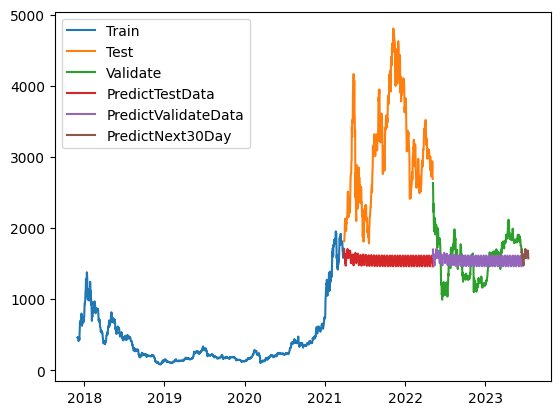

In [39]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(date_range, y_next_30_days)

plt.legend(['Train', 'Test', 'Validate','PredictTestData', 'PredictValidateData','PredictNext30Day'])
plt.show()